In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df = pd.read_csv(city_data_to_load)
df2 = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df_combined = pd.merge(df2, df, how="left", on ="city")

# Display the data table for preview
df_combined.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [3]:
average = df_combined.groupby(['type']).mean()
city_type = pd.DataFrame(average)
city_type

fare       ride_id  driver_count
type                                           
Rural     34.623440  4.647746e+12      4.296000
Suburban  30.970128  4.971015e+12     13.712000
Urban     24.525772  4.873485e+12     36.678154

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Bubble Plot of Ride Sharing Data

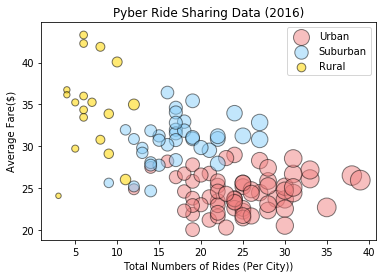

In [33]:
# Obtain the x and y coordinates for each of the three city types
urban = df_combined.loc[(df_combined["type"] == "Urban")]
suburban = df_combined.loc[(df_combined["type"] == "Suburban")]
rural = df_combined.loc[(df_combined["type"] == "Rural")]

urban_avg = urban.groupby(['city'])['fare'].mean()
urban_total_rides = urban.groupby(['city']).count()['ride_id']
urban_total_drivers = urban.groupby(['city'])['driver_count'].value_counts()

suburban_avg = suburban.groupby(['city'])['fare'].mean()
suburban_total_rides = suburban.groupby(['city']).count()['ride_id']
suburban_total_drivers = suburban.groupby(['city'])['driver_count'].value_counts()

rural_avg = rural.groupby(['city'])['fare'].mean()
rural_total_rides = rural.groupby(['city']).count()['ride_id']
rural_total_drivers = rural.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types
plt.scatter(urban_total_rides, urban_avg, s=urban_total_drivers*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(suburban_total_rides, suburban_avg,s=suburban_total_drivers*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(rural_total_rides, rural_avg,s=rural_total_drivers*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 

# Create a legend
plt.legend(loc='upper right')
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("bubble scatter")
plt.show()

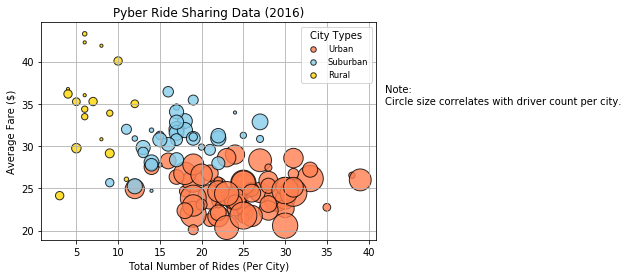

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

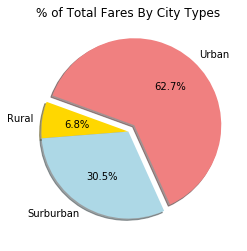

In [13]:
# Calculate Type Percents
sum_type = df_combined.groupby(['type']).sum()
total = sum_type['fare'].sum()
percent = ((sum_type['fare']/total)*100).round(1).values


# Build Pie Chart
city_type = ['Rural', 'Surburban', 'Urban']
colors = ["gold","lightblue","lightcoral"]
explode = (0.0,0.0,0.1)
plt.title("% of Total Fares By City Types")


total_fares = plt.pie(percent, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
# Save Figure
plt.savefig("fares city type pie")
plt.show()

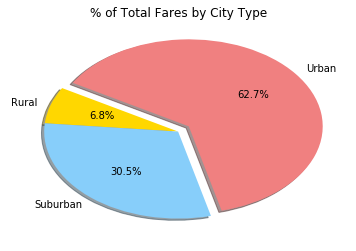

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

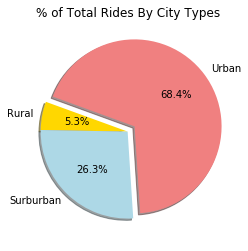

In [36]:
# Calculate Ride Percents
total_rides = df_combined.groupby(['type'])['ride_id'].count()

# Build Pie Chart
city_type = ['Rural', 'Surburban', 'Urban']
colors = ["gold","lightblue","lightcoral"]
explode = (0.0,0.0,0.1)
plt.title("% of Total Rides By City Types")


total_rides = plt.pie(total_rides, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
# Save Figure
plt.savefig("total rides city type")
plt.show()

In [35]:
# Show Figure
plt.show()

## Total Drivers by City Type

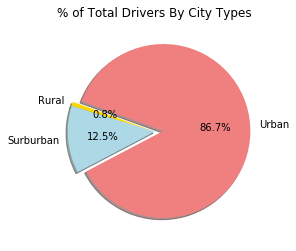

In [34]:
# Calculate Driver Percents
total_drivers = df_combined.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
city_type = ['Rural', 'Surburban', 'Urban']
colors = ["gold","lightblue","lightcoral"]
explode = (0.0,0.0,0.1)
plt.title("% of Total Drivers By City Types")

total_drivers = plt.pie(total_drivers, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
# Save Figure
plt.savefig("total drivers city types")
plt.show()

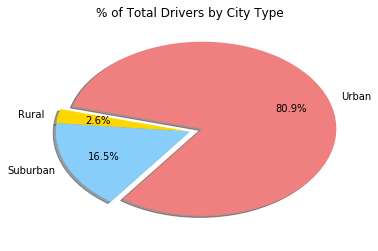

In [6]:
# Show Figure
plt.show()